## Tugas Praktikum
Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum:**

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

**Catatan Tambahan:**

Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.

Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.

Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

### Tugas 1: Multiple Linear Regression


In [1]:
# Langkah 1
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data/insurance.csv')

**1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).**

In [12]:
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
                age          bmi     children       charges
 count  1338.000000  1338.000000  1338.000000   1338.000000
 mean     39.207025    30.663397     1.094918  13270.422265
 std      14.049960     6.098187     1.205493  12110.011237
 min      18.000000    15.960000     0.000000   1121.873900
 25%      27.000000    26.296250     0.000000   4740.287150
 50%      39.000000    30.400000     1.000000   9382.033000
 75%      51.000000    34.693750     2.000000  16639.912515
 max      64.000000    53.130000     5.000000  63770.428010)

**Jawab** <br>
Data yang termasuk variabel bebas (fitur) adalah `age`, `sex`, `bmi`, `children`, `smoker`,dan `region`. Sedangkan yang termasuk variabel target adalah `charges`

**2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.**

In [13]:
from sklearn.model_selection import train_test_split
data = pd.get_dummies(data, drop_first=True)
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

**3. Lakukan feature scaling jika diperlukan.**

In [14]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_X_train = scaler.fit_transform(X_train)
sc_X_test = scaler.transform(X_test)

**4. Buat model multiple linear regression menggunakan Scikit-Learn.**

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


**5. Latih model pada data latih dan lakukan prediksi pada data uji.**

In [16]:

model.fit(sc_X_train, y_train)

y_predict = model.predict(sc_X_test)

**6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.**

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
rmse = np.sqrt(mse)

# Tampilkan hasil evaluasi
print(f"R-squared (R²): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R²): 0.7946968492150815
Mean Squared Error (MSE): 32193193.042996008
Mean Absolute Error (MAE): 3916.4377758106116
Root Mean Squared Error (RMSE): 5673.904567667314


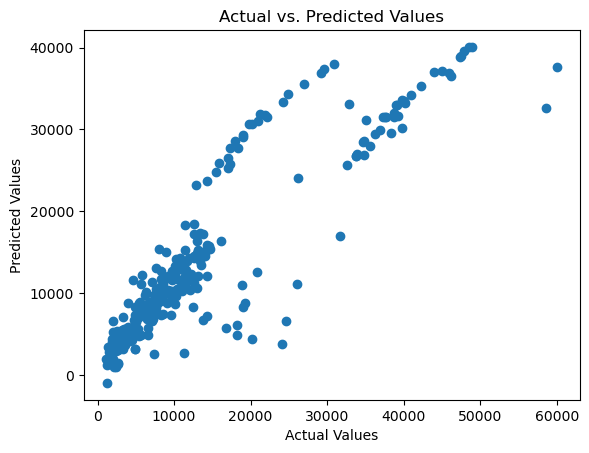

In [18]:
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()
     